In [2]:
import pandas as pd
#Operaciones numéricas
import numpy as np
#Medicion del timepo que tarda ejecutar los procesos
from time import time
#Libreria para separar datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
#Libreria para SVM
from sklearn.svm import SVC
#Medicion de precisio
from sklearn.metrics import accuracy_score, confusion_matrix
#Generar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#EXPLORACION Y MODIFICACION DE DATOS

In [4]:
#Leer el dataset
redWine_def = pd.read_csv('winequality-red.csv')
redWine_def

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#Buscar que no haya defectos en los datos del nivel de alcohol
#No debe haber una desviacion muy por arriba del valor mas alto

# Ordenar los datos por la columna 'alcohol' en orden descendente
whiteWine_def_sorted = redWine_def.sort_values(by='alcohol', ascending=False)

# Mostrar los 30 registros con el nivel de alcohol más alto
top_10_alcohol = whiteWine_def_sorted.head(10)

# Mostrar el resultado
print(top_10_alcohol[['alcohol']])

      alcohol
652      14.9
588      14.0
142      14.0
144      14.0
1270     14.0
1269     14.0
467      14.0
821      14.0
1114     13.6
1228     13.6


In [6]:
#Comprobar que no hay valores nulos ni NaN
redWine_def.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: title={'center': 'Correlation map for variables'}>

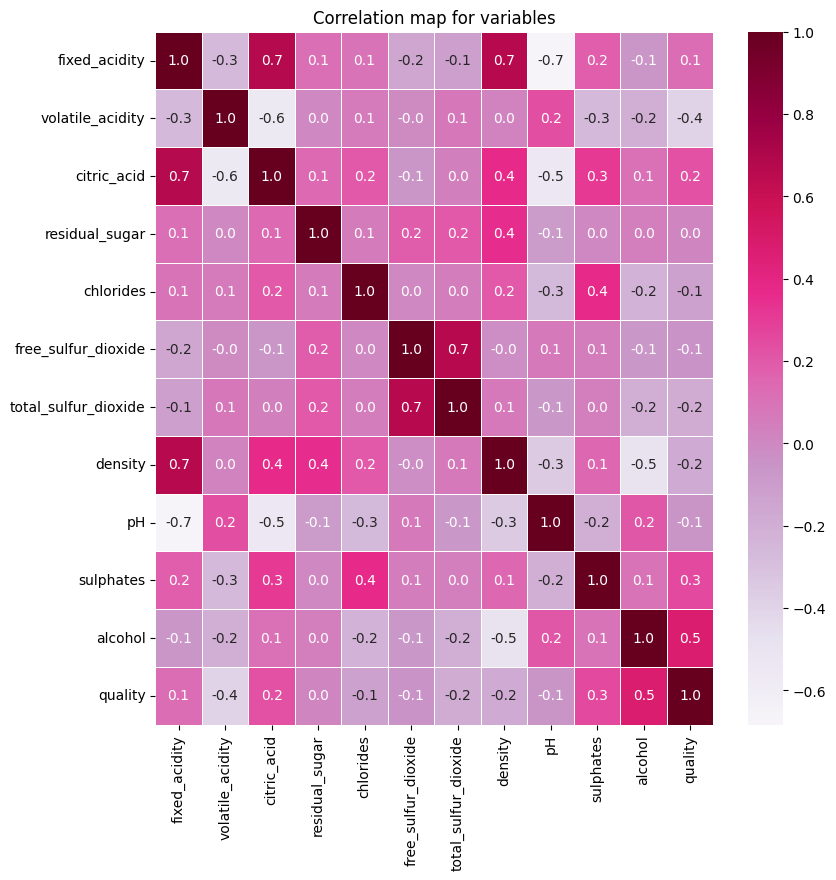

In [7]:
#Mapa de correlacion por parametros
#1: Correlación positiva perfecta. A medida que una variable aumenta, la otra también aumenta de manera proporcional.
#-1: Correlación negativa perfecta. A medida que una variable aumenta, la otra disminuye de manera proporcional.
#0: No hay correlación lineal. No hay una relación lineal discernible entre las dos variables.
f,ax = plt.subplots(figsize=(9, 9))
ax.set_title('Correlation map for variables')
sns.heatmap(redWine_def.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="PuRd")

C:\Users\a930960\AppData\Local\Temp\ipykernel_31180\4187759312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(data=redWine_def, x = 'quality', palette='muted')


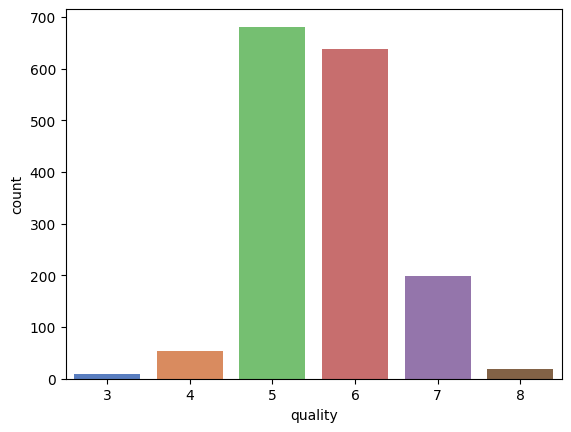

In [8]:
#Distribucion de la calida del vino
p = sns.countplot(data=redWine_def, x = 'quality', palette='muted')

In [9]:
#Valores de :media,min,max,total de registros,correlacion,ect....
redWine_def['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [10]:
#Obtener los valores de los 30 mejores vinos blancos
#Esto servirá para mostrar las posibles mejoras que se le deben aplicar a un vino y para las gráficas
# Ordenar los datos en orden descendente por 'quality'
sorted_wines = redWine_def.sort_values(by='quality', ascending=False)

# Seleccionar los 30 vinos con mejor calidad
top_30_wines = sorted_wines.head(30)

# Aplicar el método .describe() a estos vinos
stats_description = top_30_wines.describe()
stats_description

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,8.563333,0.435000,0.366333,2.608333,0.071733,14.200000,33.233333,0.995510,3.313667,0.768333,12.083333,7.600000
std,1.940580,0.138949,0.204425,1.157143,0.014496,10.226403,21.938289,0.002198,0.191446,0.105114,1.138990,0.498273
min,5.000000,0.260000,0.000000,1.400000,0.044000,3.000000,11.000000,0.990800,2.880000,0.630000,9.800000,7.000000
25%,7.400000,0.335000,0.255000,1.825000,0.062000,6.000000,16.250000,0.994252,3.212500,0.690000,11.225000,7.000000
50%,8.400000,0.400000,0.385000,2.400000,0.072500,12.000000,28.000000,0.995220,3.305000,0.745000,11.950000,8.000000
75%,10.225000,0.512500,0.525000,2.600000,0.080000,17.000000,41.750000,0.997200,3.377500,0.820000,12.875000,8.000000
max,12.600000,0.850000,0.720000,6.400000,0.116000,42.000000,88.000000,1.000200,3.720000,1.100000,14.000000,8.000000


In [ ]:
#DEFINIR EL SET DE DATOS PARA LA PREDICCION

In [20]:
#dEFINIR X , y
#La x son todas las columnas menos la quality
X = redWine_def.drop(['quality'], axis=1)
#La y es las calidad ( output )
y = redWine_def['quality']

In [25]:
#Crear el dataset para la prediccion
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Comprobar 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1279, 11)
y_train: (1279,)
X_test: (320, 11)
y_test: (320,)


In [27]:
# 1. Usar Random Forest Classifier
t0 = time()
# Cargar  random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Crear un  random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)


#Definicion del modelo


# ENTRENAMIENTO DEL MODELO
clf.fit(X_train, y_train)

# Predecir la respuesta
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
#Importar scikit-learn metrics module para calcular la exactitud del modelo 
from sklearn import metrics

# evaluate accuracy
print("Exactitud del modelo:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('El entrenamiento ha tardado', round(time() - t0, 3), 's')

Exactitud del modelo: 65.0 %
El entrenamiento ha tardado 0.289 s


In [28]:
import joblib

# Guardar el modelo en un archivo .pkl
joblib.dump(clf, 'red_wine_quality_model.pkl')

['red_wine_quality_model.pkl']